Importing the requied libraries, image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
main_image = cv2.imread("/content/drive/MyDrive/standard_test_images/lena_gray_512.tif")

In [ ]:
from google.colab.patches import cv2_imshow
import matplotlib.image as img

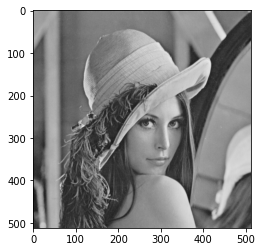

In [ ]:
plt.imshow(main_image)

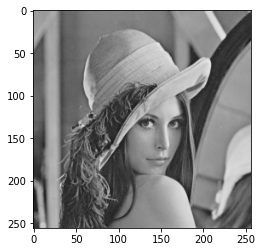

In [ ]:
dim = (256, 256)

newresizedImage = cv2.resize(main_image,dim)

plt.imshow(newresizedImage)

In [ ]:
cv2.imwrite('newImage.png',newresizedImage)

True

In [ ]:
newresizedImage.shape

(256, 256, 3)

1(B)

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/standard_test_images/lena_gray_256.tif')
img2 = cv2.imread('/content/newImage.png')

psnr = cv2.PSNR(img1, img2)


print(psnr)

31.058421717719376


In [ ]:
#comparing two images
import math


original = cv2.imread('/content/drive/MyDrive/standard_test_images/lena_gray_256.tif')
contrast = cv2.imread('/content/newImage.png')

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d = psnr(original, contrast)
print(d)

34.67276146096948


1(C)

Third one Nearest Neighbour Interpolation

In [ ]:
Nearest_img = cv2.resize(newresizedImage,(512,512),cv2.INTER_NEAREST)
print('Generated Nearest Neighbour Interpolation Image Shape:', Nearest_img.shape)

Generated Nearest Neighbour Interpolation Image Shape: (512, 512, 3)


Bilinear Interpolation

In [ ]:
Bilinear_img = cv2.resize(newresizedImage,(512,512),cv2.INTER_LINEAR)
print('Generated Bilinear Image Shape:', Bilinear_img.shape)

Generated Bilinear Image Shape: (512, 512, 3)


Bicubic Interpolation

In [ ]:
Bicubic_img = cv2.resize(newresizedImage,(512,512),cv2.INTER_CUBIC)
print('Generated Bicubic Image Shape:', Bicubic_img.shape)

Generated Bicubic Image Shape: (512, 512, 3)



 **Question 2**

In [ ]:
from scipy import ndimage

In [ ]:
imgDerive = plt.imread("/content/drive/MyDrive/standard_test_images/lena_gray_512.tif")

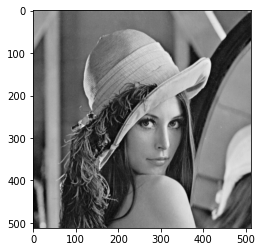

In [ ]:
plt.imshow(imgDerive,cmap='gray')

Derivative x direction

In [ ]:
Kx = -1*np.array([[-1,0,1]])
Fx = ndimage.convolve(imgDerive, Kx)

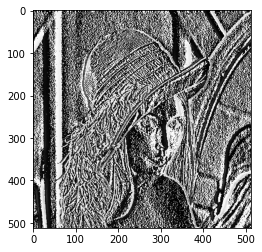

In [ ]:
plt.imshow(Fx,cmap='gray')

Derivative Y direction

In [ ]:
Ky = -1*np.array([[-1],[0],[1]])
Fy = ndimage.convolve(imgDerive, Ky)

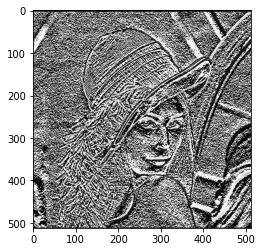

In [ ]:
plt.imshow(Fy,cmap='gray')

Gradient image magnitude and followed by thresholding to output edge map.

In [ ]:
edging = np.zeros((256,256), dtype = np.float32)
for i in range(256):
  for j in  range(256):
    mod = np.sqrt(Fx[i][j]**2 + Fy[i][j]**2)
    if mod>250:
      edging[i][j] = 1.0

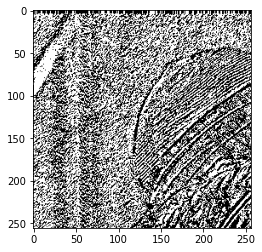

In [ ]:
plt.imshow(edging,cmap='gray')

Edge map computed using second order derivative

In [ ]:
img = plt.imread("/content/drive/MyDrive/standard_test_images/cameraman.tif")

In [ ]:
img = cv2.GaussianBlur(img,(13,13),0)

In [ ]:
edges = cv2.Laplacian(img, -1, ksize=5, scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)

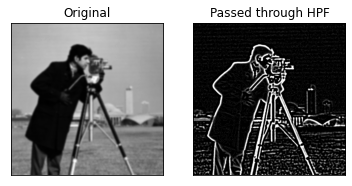

In [ ]:
output = [img, edges]
titles = ['Original', 'Passed through HPF']

for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.imshow(output[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

LOG Edge Detection

In [ ]:
img = cv2.imread("/content/drive/MyDrive/standard_test_images/cameraman.tif",flags=0) 
blur = cv2.GaussianBlur(img,(13,13),0)


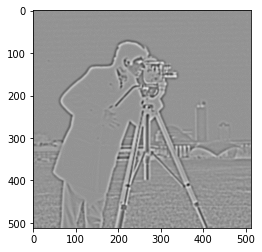

In [ ]:

# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
laplacian1 = laplacian/laplacian.max()
plt.imshow(laplacian1,cmap='gray')

Canny Edge Detection

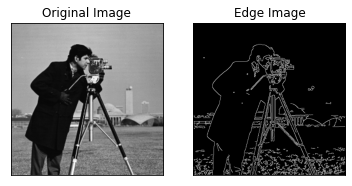

In [ ]:
img = plt.imread("/content/drive/MyDrive/standard_test_images/cameraman.tif",0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()